In [1]:
##Importing the libraries
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import requests
%matplotlib inline

***
#### Data Retrieval 

In [2]:
#importing the URL for the DATAset
Cars2017 = 'https://www.nrcan.gc.ca/sites/www.nrcan.gc.ca/files/oee/files/csv/MY2017%20Fuel%20Consumption%20Ratings.csv'
Cars2018 ='https://www.nrcan.gc.ca/sites/www.nrcan.gc.ca/files/oee/files/csv/MY2018%20Fuel%20Consumption%20Ratings.csv'
Cars2019 ='https://www.nrcan.gc.ca/sites/www.nrcan.gc.ca/files/oee/files/csv/MY2019%20Fuel%20Consumption%20Ratings.csv'
Cars2020 ='https://www.nrcan.gc.ca/sites/www.nrcan.gc.ca/files/oee/files/csv/MY2020%20Fuel%20Consumption%20Ratings.csv'

In [3]:
#Reading the Data Sets
Cars17 = pd.read_csv(Cars2017, encoding='latin1')
Cars18 =  pd.read_csv(Cars2018, encoding='latin1')
Cars19 =  pd.read_csv(Cars2019, encoding='latin1')
Cars20 =  pd.read_csv(Cars2020, encoding='latin1')


D:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,1,2,3,4,6,7,8,9,10,11,12,13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


*** 

### Data Preprocessing

In [4]:
#identifying Models in 2017 dataset
Cars17['MODEL'].value_counts()

2017                                                                                                                                                                                                                                                                     1058
YEAR                                                                                                                                                                                                                                                                        1
Fuel Consumption                                                                                                                                                                                                                                                            1
of everyday driving. To help you compare vehicles from different model years, the ratings for 1995-2014 vehicles have been adjusted to reflect the improved testing.                          

In [5]:
#Reducing Size of 2017 Data Set to that of car  Numbers 
Cars17 = Cars17.iloc[0:1059, 0:15]


In [6]:
#Finding out Number of cars in 2018 Dataset
Cars18['MODEL'].value_counts()

2018                       1083
YEAR                          1
Fuel Consumption              1
Understanding the Table       1
CO2 Rating                    1
Transmission                  1
CO2 Emissions                 1
Smog Rating                   1
Model                         1
Fuel Type                     1
Name: MODEL, dtype: int64

In [7]:
#Reducing the Size of the Dataset to Cars of that Model
Cars18 = Cars18.iloc[0:1084 , 0:15]

In [8]:
#Finding out Number of cars in 2019 Dataset
Cars19['Model'].value_counts()

2019                       1050
Fuel consumption              1
CO2 rating                    1
CO2 emissions                 1
Transmission                  1
Fuel type                     1
Smog rating                   1
Understanding the table       1
Year                          1
Model                         1
Name: Model, dtype: int64

In [9]:
#Reducing the Size of the Dataset to Cars of that Model
Cars19 = Cars19.iloc[0:1050 , 0:15]

In [10]:
#Finding out Number of cars in 2020 Dataset
Cars20['Model'].value_counts()

2020                       927
CO2 rating                   1
CO2 emissions                1
Transmission                 1
Fuel type                    1
Understanding the table      1
Fuel consumption             1
Smog rating                  1
Year                         1
Model                        1
Name: Model, dtype: int64

In [11]:
#Reducing the Size of the Dataset to Cars of that Model
Cars20 = Cars20.iloc[0:928 , 0:15]

In [12]:
Cars20.head()

,Model,Make,Model.1,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption,Unnamed: 9,Unnamed: 10,Unnamed: 11,CO2 Emissions,CO2,Smog
0,Year,NaN,NaN,NaN,(L),NaN,NaN,Type,City (L/100 km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),(g/km),Rating,Rating
1,2020,Acura,ILX,Compact,2.4,4.0,AM8,Z,9.9,7.0,8.6,33,199,6,3
2,2020,Acura,MDX SH-AWD,SUV: Small,3.5,6.0,AS9,Z,12.3,9.2,10.9,26,254,4,3
3,2020,Acura,MDX SH-AWD A-SPEC,SUV: Small,3.5,6.0,AS9,Z,12.2,9.5,11.0,26,258,4,3
4,2020,Acura,MDX Hybrid AWD,SUV: Small,3.0,6.0,AM7,Z,9.1,9.0,9.0,31,210,5,3


In [13]:
#Standardizing the column Names to Combine the Datasets
Car20 = Cars20.rename(columns={Cars20.columns[9]: "Fuelconsumption_city", Cars20.columns[9]: "Fuelconsumption_HWY", Cars20.columns[10]: "Fuelconsumption_COMB", Cars20.columns[11]: "comp_MPG",  })

In [14]:
Cars18.head()

,MODEL,MAKE,MODEL.1,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,Unnamed: 9,Unnamed: 10,Unnamed: 11,CO2 EMISSIONS,CO2,SMOG
0,YEAR,NaN,NaN,NaN,(L),NaN,NaN,TYPE,CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),(g/km),RATING,RATING
1,2018,ACURA,ILX,COMPACT,2.4,4.0,AM8,Z,9.4,6.8,8.2,34,192,6,3
2,2018,ACURA,MDX SH-AWD,SUV - SMALL,3.5,6.0,AS9,Z,12.6,9.0,11.0,26,259,4,3
3,2018,ACURA,MDX SH-AWD ELITE,SUV - SMALL,3.5,6.0,AS9,Z,12.2,9.0,10.7,26,251,4,3
4,2018,ACURA,MDX HYBRID AWD,SUV - SMALL,3.0,6.0,AM7,Z,9.1,9.0,9.0,31,210,5,3


In [15]:
Car17 = pd.DataFrame(data=Cars17.values, columns=Car20.columns)
Car18 = pd.DataFrame(data=Cars18.values, columns=Car20.columns)
Car19 = pd.DataFrame(data=Cars19.values, columns=Car20.columns)


In [16]:
Car19.head()

,Model,Make,Model.1,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption,Fuelconsumption_HWY,Fuelconsumption_COMB,comp_MPG,CO2 Emissions,CO2,Smog
0,Year,NaN,NaN,NaN,(L),NaN,NaN,Type,City (L/100 km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),(g/km),Rating,Rating
1,2019,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,199,6,3
2,2019,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS9,Z,12.2,9.0,10.8,26,252,4,3
3,2019,Acura,MDX SH-AWD A-SPEC,SUV: Small,3.5,6,AS9,Z,12.2,9.5,11.0,26,258,4,3
4,2019,Acura,MDX Hybrid AWD,SUV: Small,3.0,6,AM7,Z,9.1,9.0,9.0,31,210,5,3


In [17]:
#Combining Data Sets to One file 
Cars = pd.concat([Car17,Car18, Car19, Car20], ignore_index=True) 

In [18]:
Cars = pd.DataFrame(data=Cars.values, columns=Car20.columns)  


In [19]:
MissingData = Cars.isnull()

In [20]:
for column in MissingData.columns.values.tolist():
    print(column)
    print (MissingData[column].value_counts())
    print("")    

Model
False    4121
Name: Model, dtype: int64

Make
False    4117
True        4
Name: Make, dtype: int64

Model.1
False    4117
True        4
Name: Model.1, dtype: int64

Vehicle Class
False    4117
True        4
Name: Vehicle Class, dtype: int64

Engine Size
False    4121
Name: Engine Size, dtype: int64

Cylinders
False    4117
True        4
Name: Cylinders, dtype: int64

Transmission
False    4117
True        4
Name: Transmission, dtype: int64

Fuel
False    4121
Name: Fuel, dtype: int64

Fuel Consumption
False    4121
Name: Fuel Consumption, dtype: int64

Fuelconsumption_HWY
False    4121
Name: Fuelconsumption_HWY, dtype: int64

Fuelconsumption_COMB
False    4121
Name: Fuelconsumption_COMB, dtype: int64

comp_MPG
False    4121
Name: comp_MPG, dtype: int64

CO2 Emissions
False    4121
Name: CO2 Emissions, dtype: int64

CO2
False    4121
Name: CO2, dtype: int64

Smog
False    4121
Name: Smog, dtype: int64



In [21]:
Cars.dropna()

,Model,Make,Model.1,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption,Fuelconsumption_HWY,Fuelconsumption_COMB,comp_MPG,CO2 Emissions,CO2,Smog
1,2017,ACURA,ILX,COMPACT,2.4,4,AM8,Z,9.4,6.8,8.2,34,192,7,6
2,2017,ACURA,MDX SH-AWD,SUV - SMALL,3.5,6,AS9,Z,12.6,9.0,11.0,26,259,4,6
3,2017,ACURA,MDX SH-AWD ELITE,SUV - SMALL,3.5,6,AS9,Z,12.2,9.0,10.7,26,251,5,6
4,2017,ACURA,MDX HYBRID AWD,SUV - SMALL,3.0,6,AM7,Z,9.1,9.0,9.0,31,210,6,6
5,2017,ACURA,NSX,TWO-SEATER,3.5,6,AM9,Z,11.1,10.8,11.0,26,261,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4116,2020,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,5,5
4117,2020,Volvo,XC60 T5 AWD,SUV: Small,2.0,4,AS8,Z,11.2,8.3,9.9,29,232,5,5
4118,2020,Volvo,XC60 T6 AWD,SUV: Small,2.0,4,AS8,Z,11.7,8.6,10.3,27,240,5,7
4119,2020,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.2,8.3,9.9,29,232,5,5


*** 
#### Data Cleaning 


In [22]:
Cars.head()

,Model,Make,Model.1,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption,Fuelconsumption_HWY,Fuelconsumption_COMB,comp_MPG,CO2 Emissions,CO2,Smog
0,YEAR,NaN,NaN,NaN,(L),NaN,NaN,TYPE,CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),(g/km),RATING,RATING
1,2017,ACURA,ILX,COMPACT,2.4,4,AM8,Z,9.4,6.8,8.2,34,192,7,6
2,2017,ACURA,MDX SH-AWD,SUV - SMALL,3.5,6,AS9,Z,12.6,9.0,11.0,26,259,4,6
3,2017,ACURA,MDX SH-AWD ELITE,SUV - SMALL,3.5,6,AS9,Z,12.2,9.0,10.7,26,251,5,6
4,2017,ACURA,MDX HYBRID AWD,SUV - SMALL,3.0,6,AM7,Z,9.1,9.0,9.0,31,210,6,6


In [23]:
Cars['Model'].value_counts()

2018    1083
2017    1058
2019    1049
2020     927
YEAR       2
Year       2
Name: Model, dtype: int64

In [24]:
indexname = Cars[Cars['Model'] == 'YEAR'].index

In [25]:
Cars.drop(indexname, inplace = True)

In [26]:
Cars['Model'].value_counts()

2018    1083
2017    1058
2019    1049
2020     927
Year       2
Name: Model, dtype: int64

In [27]:
indexname = Cars[Cars['Model'] == 'Year'].index

In [28]:
Cars.drop(indexname, inplace = True)

In [29]:
Cars.head()

,Model,Make,Model.1,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption,Fuelconsumption_HWY,Fuelconsumption_COMB,comp_MPG,CO2 Emissions,CO2,Smog
1,2017,ACURA,ILX,COMPACT,2.4,4,AM8,Z,9.4,6.8,8.2,34,192,7,6
2,2017,ACURA,MDX SH-AWD,SUV - SMALL,3.5,6,AS9,Z,12.6,9.0,11.0,26,259,4,6
3,2017,ACURA,MDX SH-AWD ELITE,SUV - SMALL,3.5,6,AS9,Z,12.2,9.0,10.7,26,251,5,6
4,2017,ACURA,MDX HYBRID AWD,SUV - SMALL,3.0,6,AM7,Z,9.1,9.0,9.0,31,210,6,6
5,2017,ACURA,NSX,TWO-SEATER,3.5,6,AM9,Z,11.1,10.8,11.0,26,261,4,6


In [30]:
Cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4117 entries, 1 to 4120
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Model                 4117 non-null   object
 1   Make                  4117 non-null   object
 2   Model.1               4117 non-null   object
 3   Vehicle Class         4117 non-null   object
 4   Engine Size           4117 non-null   object
 5   Cylinders             4117 non-null   object
 6   Transmission          4117 non-null   object
 7   Fuel                  4117 non-null   object
 8   Fuel Consumption      4117 non-null   object
 9   Fuelconsumption_HWY   4117 non-null   object
 10  Fuelconsumption_COMB  4117 non-null   object
 11  comp_MPG              4117 non-null   object
 12  CO2 Emissions         4117 non-null   object
 13  CO2                   4117 non-null   object
 14  Smog                  4117 non-null   object
dtypes: object(15)
memory usage: 514.6+ KB


In [31]:
#Changing the Data Type of the Variables
Cars = Cars.astype({"Model":'category', "Engine Size":'float', "Cylinders":'int',"Fuel Consumption":'float', "Fuelconsumption_HWY":'float', "Fuelconsumption_COMB":'float', "comp_MPG":'int', "CO2 Emissions":'int', "CO2":'int', "Smog":'int', })

In [32]:
Cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4117 entries, 1 to 4120
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Model                 4117 non-null   category
 1   Make                  4117 non-null   object  
 2   Model.1               4117 non-null   object  
 3   Vehicle Class         4117 non-null   object  
 4   Engine Size           4117 non-null   float64 
 5   Cylinders             4117 non-null   int32   
 6   Transmission          4117 non-null   object  
 7   Fuel                  4117 non-null   object  
 8   Fuel Consumption      4117 non-null   float64 
 9   Fuelconsumption_HWY   4117 non-null   float64 
 10  Fuelconsumption_COMB  4117 non-null   float64 
 11  comp_MPG              4117 non-null   int32   
 12  CO2 Emissions         4117 non-null   int32   
 13  CO2                   4117 non-null   int32   
 14  Smog                  4117 non-null   int32   
dtypes: c

***
### Feature Correlation

In [33]:
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();

In [34]:
#Standardizing the column Names to Combine the Datasets
Cars = Cars.rename(columns={Cars.columns[8]: "Fuelconsumption_city"})

In [35]:
Cars.dtypes

Model                   category
Make                      object
Model.1                   object
Vehicle Class             object
Engine Size              float64
Cylinders                  int32
Transmission              object
Fuel                      object
Fuelconsumption_city     float64
Fuelconsumption_HWY      float64
Fuelconsumption_COMB     float64
comp_MPG                   int32
CO2 Emissions              int32
CO2                        int32
Smog                       int32
dtype: object

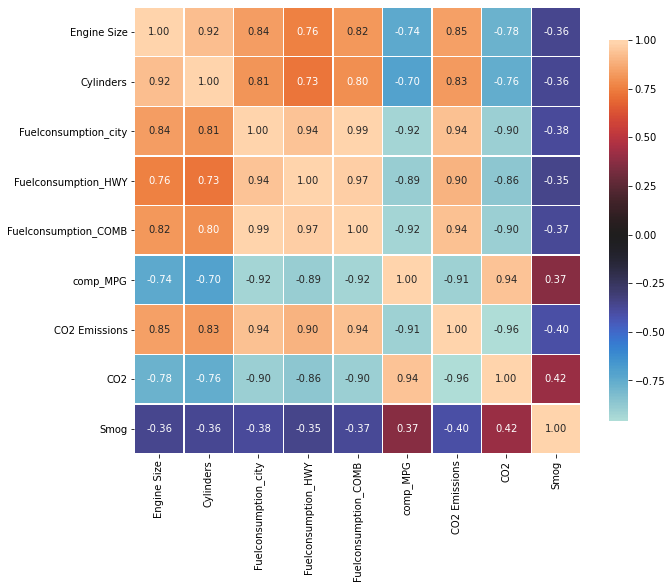

In [36]:
correlation_heatmap(Cars)

Having Identified the correlating feature - we create a room for  
- we will use the Multi Linear Regression to train our model - to enable it to predict the Carbon emission produced by a car with these specific Features


In [37]:
Cars.dtypes

Model                   category
Make                      object
Model.1                   object
Vehicle Class             object
Engine Size              float64
Cylinders                  int32
Transmission              object
Fuel                      object
Fuelconsumption_city     float64
Fuelconsumption_HWY      float64
Fuelconsumption_COMB     float64
comp_MPG                   int32
CO2 Emissions              int32
CO2                        int32
Smog                       int32
dtype: object

In [42]:
cdf = Cars[['Engine Size','Cylinders','Fuelconsumption_HWY','Fuelconsumption_city','CO2 Emissions']]

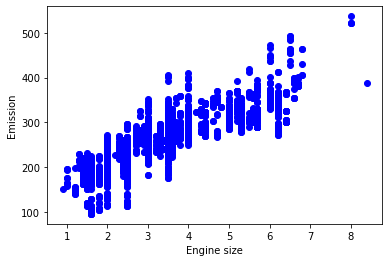

In [39]:
plt.scatter(cdf['Engine Size'], cdf['CO2 Emissions'],  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

*** 
Creating Our Model


In [40]:
#Creating an 80% - 20% split for 
msk = np.random.rand(len(Cars)) < 0.8
train = cdf[msk]
test = cdf[~msk]

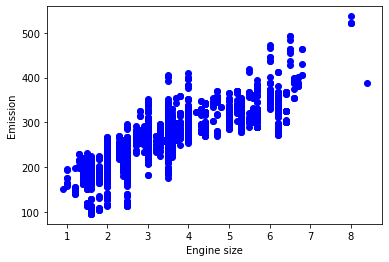

In [41]:
#Testing Train Sets Scatter Plot to isure the same biased Continues in the Data
plt.scatter(train['Engine Size'], train['CO2 Emissions'],  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [43]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Engine Size','Cylinders','Fuelconsumption_HWY','Fuelconsumption_city']])
y = np.asanyarray(train[['CO2 Emissions']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[3.8862713  5.35694295 6.49020553 8.6055847 ]]


In [44]:
y_hat= regr.predict(test[['Engine Size','Cylinders','Fuelconsumption_HWY','Fuelconsumption_city']])
x = np.asanyarray(test[['Engine Size','Cylinders','Fuelconsumption_HWY','Fuelconsumption_city']])
y = np.asanyarray(test[['CO2 Emissions']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 248.25
Variance score: 0.92
